# 信息论基础
## 熵
对离散随机变量X,其概率分布为 $$P(X=x_i)=p_i, \space \space i=1,2,...,n$$

则其熵为
$$H(p) = -\sum_{i=1}^{n}p_ilogp_i$$


熵越大, 随机变量的不确定性就越大

## 联合熵
对
$$H(X,Y)=−\sum_{i=1}^{n}\sum_{j=1}^{m}p(x_i, y_j)logp(x_i,y_j)$$

## 条件熵
对随机变量(X,Y), 联合概率分布为 $$P(X=x, Y=y_j)=p_{ij} \space \space j=1,2,...,m$$

则在给定X下Y的条件熵为 $$H(Y|X)= \sum_{i=1}^{n}p_iH(Y|X=x_i) \\ 其中p_i=P(X=x_i), \space i=1,2,...,n$$

当熵和条件熵中的概率有数据估计(特别是极大死然估计)得到时, 对于的熵与条件伤分别为经验熵与经验条件熵
## 信息增益
>ID3

信息增益表示得知特征X的信息而是的Y的信息的不确定减少的程度

特征A对训练数据集D的信息增益$$g(D,A)=H(D)-H(D|A)$$

>C4.5

C4.5算法用增益率来划分最优属性, $$g_R(D,A)=\frac{g(D,A)}{H_A(D)} \\ H_A(D)=-\sum_{i=1}^{n}\frac{|D_i|}{|D|}log_2\frac{|D_i|}{|D|}$$



## 基尼不纯度
>CART

CART使用Gini指数来划分最优属性$$Gini(D)=\sum_{k=1}^{|\mathcal Y|}\sum_{k'\neq k}p_kp_{k'}\\ = 1-\sum_{k=1}^{|\mathcal Y|}p_k^2$$


Gini(D)反映了从数据集D中随机抽取两个样本, 其类别标记的不一致的概率, Gini(D)越小,则数据集D纯度越高.

则属性a的Gini指数为$$Gini\_index(D,a)=\sum_{v=1}^{V}\frac{|D^v|}{|D|}Gini(D^v)$$

# [决策树的不同分类算法（ID3算法、C4.5、CART分类树）的原理及应用场景](https://www.jianshu.com/p/38aa0daf6841)
决策树（Decision Tree）的思想是贪心(最优化分) 与 分治(子树划分)。构建决策树的目的是：随着划分过程的进行，使得决策树分支结点所包含的样本尽可能属于同一类别，即使得分类更准确

![决策树知识结构](./imgs/DecisionTree.png)
## ID3
Input:  训练集D={(x1, y1), (x2, y2), ..., (xm, ym)};

        属性集A={a1, a2, ..., ad}.
        
Output: 以node为根结点的一个决策树

Process: 通过给定样本集D和属性集A构建决策树
>算法 

```
TreeGenerate(D, A){
    1: 生成结点node;
    2: if D 中样本全属于同一类别C then
    3:      将node标记为 C类 叶结点; return
    4: end if
    5: if A = ∅ OR D中样本在A上取值相同 then
    6:      将node标记为叶结点，其类别标记为D中样本数最多的类; return 
    7: end if
    8: 从 A 中选择最优化分属性 a*
    9: for a* 的每一值a[i] do
   10:      为node生成一个分支; 令Dv表示D中在 a* 上取值为 a[i] 的样本子集;
   11:      if Dv is empty then
   12:          将分支结点标记为叶结点，其类别为D中样本最多的类; return
   13:      else
   14:          以 TreeGenerate(Dv, A\{a*}) 为分支结点;
   15:      end if
   16: end for
}
```
## C4.5
>生成算法

输入: 训练集D, 特征集A,阈值$\varepsilon$;
输出:决策树T
- 1. 如果D中所以实例为统一类别$C_k$, 则置T为单结点树, 并将$C_k$作为该结点的类别, return;
- 2. 如果A为$\emptyset$, 则置T为单结点树, 并将D中实例数最大的类别$C_k$作为该结点的类别, return;
- 3. 否则, 计算A中各特征的信息增益比, 选择最优特征$A_g$;
- 4. 如果$A_g$的信息增益比小于阈值$\varepsilon$, 则置T为单结点树, 并将D中实例书最大的类$C_k$作为该结点的类, return ;
- 5. 否则, 对$A_g$的没一个可能值$a_i$, 依$A_g=a_i$将D分割为资格若干非空$D_i$, 将$D_i$中实例数最大的类作为标记, 构建子结点, 由结点及其子结点构成树T, return
- 6. 对结点i, 以$D_i$为训练集, 以A-{$A_g$}为特征集, 递归调用1-5步, 得到子树$T_i, 返回T_i$


#  决策树防止过拟合手段
> 预减枝

通过提前停止树的构建而对树剪枝，一旦停止，节点就是树叶，该树叶持有子集元祖最频繁的类。

停止决策树生长最简单的方法有：

- 1.定义一个高度，当决策树达到该高度时就停止决策树的生长

- 2.达到某个节点的实例具有相同的特征向量，及时这些实例不属于同一类，也可以停止决策树的生长。这个方法对于处理数据的数据冲突问题比较有效。

- 3.定义一个阈值，当达到某个节点的实例个数小于阈值时就可以停止决策树的生长

- 4.定义一个阈值，通过计算每次扩张对系统性能的增益，并比较增益值与该阈值大小来决定是否停止决策树的生长。


>后减枝

```
Input: 生成算法产生的整个决策树T，参数α
Output: 剪枝后的子树T’

Process:
1: 计算每个结点的经验熵
2: 递归地从树的叶结点向上回缩
    设一组叶结点回缩到父结点之前与之后的整体树分别为T1于T2，
    其对应的损失函数值分别为Cα(T1)和Cα(T2)，
    if Cα(T1)≤Cα(T2) then
      进行剪枝(pruning)
    end if
3: 返回第2步，直至不能继续为止，得到损失函数最小的子树T’
```

# CART
### 分类树
输入: 训练数据集D, 停止计算条件

输出:CART决策树

根据训练数据集,从根结点开始, 递归对每个结点进行以下操作, 构建二叉决策树
- 1. 设结点的训练数据集为D, 计算现有特征对该数据集的Gini指数, 此时, 对每个特征A, 对其可能取值的每个a, 根据样本点对A=a的测试结果'是'和'否'将D分割成$D_1和D_2两部分, 计算A=a时的Gini指数.$
- 2. 在所有可能的特征A以及它们所有可能的切分点a中, 选择Gini指数最小的特征及其对应的切分点作为最优特征和最优切分点,切分结点, 从现结点生成两个子结点,将训练数据集依特征分配到两个子结点中去.
- 3. 对两个子结点递归调用1,2, 知道满足停止条件
- 4. 生成CART决策树

###  回归树
输入: 训练数据集D, 

输出: 回归树发f(x)

在训练数据集所在的输入空间中, 递归将每个区域划分为两个子区域并决定每个子区域上的输出值, 构建二叉决策树
- 1.选择最优切分变量j与切分点s, 求解$$\mathop{min}_{j,s}\left[\mathop{min}_{c_1}\sum_{x_i\in R_1(j,s)}(y_i-c_1)^2+\mathop{min}_{c_2}\sum_{x_i\in R_2(j,s)}(y_i-c_2)^2\right]$$遍历j,对固定的切分变量j扫描切分点s, 选择使公式达到最小的(j,s)对, $c_i为划分空间固定的输出值$
- 2.用选定的(j,s)划分区域并决定相应的输出值: $$R_1(j,s)=\{x|x^{(j)}\leq s\}, \space\space R_2(j,s)=\{x|x^{(j)}>s\} \\ \hat{c}_m=\frac{1}{N_m}\mathop{\sum}_{x_i\in R_m(j,s)}y_i, \space\space x\in R_m, \space\space m=1,2$$
- 3. 对两个子区域递归调用步骤1,2, 直到满足停止条件
- 4. 将收入空间划分为M个区域$R_1,R_2,...R_M, 生成回归树: f(x)=\mathop{\sum}_{m=1}^{M}\hat{c}_mI(x\in R_m),\hat{c}_m是R_m上所有输入实例x_i对应y_i的均值$,

### CART剪枝
在剪枝的过程中, 计算子树的损失函数:$$C_\alpha(T)=C(T) + \alpha|T|$$ 其中,T为任意子树,C(T)是对训练数据的预测误差,|T|为子树叶结点数,$C_\alpha(T)为参数是\alpha时的子树T的整体损失, 参数\alpha权衡训练数据的你和程度和模型的复杂度$

输入: CART生成的决策树T_0;

输出: 最优决策树$T_\alpha$
- 1. 设k=0, $T=T_0$
- 2. 设$\alpha=+ \infty$
- 3. 自上而下对内部结点t计算$C(T_t), |T_t|$以及$$g(t)=\frac{C(t)-C(T_t)}{|T_t|-1}\\ \alpha=min(\alpha,g(t))$$这里$T_t表示以t为根结点的子树, C(T_t)的对训练数据的预测误差, |T_t|是T_t的叶结点个数$
- 4. 对$g(t)=\alpha的内部节点t进行剪枝,并对叶结点t以多数表决法决定其类别, 得到树T$
- 5. 另k=k+1, $alpha_k=\alpha, T_k=T
- 6. 如果T_k不是由根节点及两个叶结点构成的树, 则回到步骤3, 否则另$T_k=T_n
- 7. 采用交叉验证法在子树序列$T_0, T_1,...,T_n中选取最优子树T_\alpha$

#  sklearn参数详解，Python绘制决策树
|名称|功能|描述
|:-:|:-:|:-:
|criterion|特征选择标准|‘gini’ or ‘entropy’ (default=”gini”)，前者是基尼系数，后者是信息熵。两种算法差异不大对准确率无影响，信息墒运算效率低一点，有对数运算.
|splitter|特征划分标准|‘best’ or ‘random’ (default=”best”) 前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点。 默认的”best”适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐”random” 。
|max_depth|决策树最大深度|int or None, optional (default=None) 一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。常用来解决过拟合
|min_impurity_decrease|节点划分最小不纯度|float, optional (default=0.) 这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点。 
|
min_samples_split|内部节点再划分所需最小样本数|int, float, optional (default=2) 如果是 int，则取传入值本身作为最小样本数； 如果是 float，则去 ceil(min_samples_split * 样本数量) 的值作为最小样本数，即向上取整。
|min_samples_leaf|叶子节点最少样本数|如果是 int，则取传入值本身作为最小样本数； 如果是 float，则去 ceil(min_samples_leaf * 样本数量) 的值作为最小样本数，即向上取整。 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝
|max_leaf_nodes|最大叶子节点数|int or None, optional (default=None) 通过限制最大叶子节点数，可以防止过拟合，默认是”None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。
|min_impurity_split|信息增益的阀值|决策树在创建分支时，信息增益必须大于这个阀值，否则不分裂
|min_weight_fraction_leaf|叶子节点最小的样本权重和|float, optional (default=0.) 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。
|class_weight|类别权重|dict, list of dicts, “balanced” or None, default=None 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的”None” 不适用于回归树 sklearn.tree.DecisionTreeRegressor


In [82]:
import numpy as np
np.random.seed(99999)
from sklearn import datasets
load_dataset = datasets.make_classification
data = load_dataset(n_samples=1000, n_classes=4, n_features=2, 
                    n_redundant=0, n_informative=2, n_clusters_per_class=1)

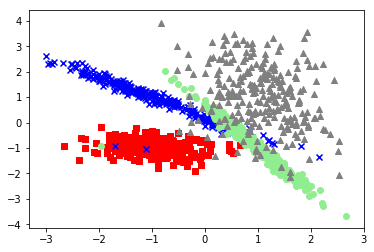

In [83]:
import matplotlib.pyplot as plt
plt.scatter(data[0][data[1]==0,0], data[0][data[1]==0,1], c='r', marker='s')
plt.scatter(data[0][data[1]==1,0], data[0][data[1]==1,1], c='b', marker='x')
plt.scatter(data[0][data[1]==2,0], data[0][data[1]==2,1], c='lightgreen', marker='o')
plt.scatter(data[0][data[1]==3,0], data[0][data[1]==3,1], c='gray', marker='^');

In [84]:
from sklearn import tree
id3 = tree.DecisionTreeClassifier(criterion='entropy')
id3.fit(data[0], data[1])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

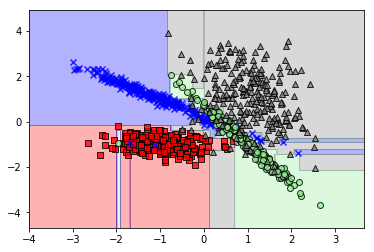

In [25]:
from matplotlib.colors import ListedColormap
# https://github.com/rasbt/python-machine-learning-book-2nd-edition/tree/master/code/ch03
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

plot_decision_regions(X=data[0], y=data[1],
                      classifier=id3, test_idx=range(105, 150))

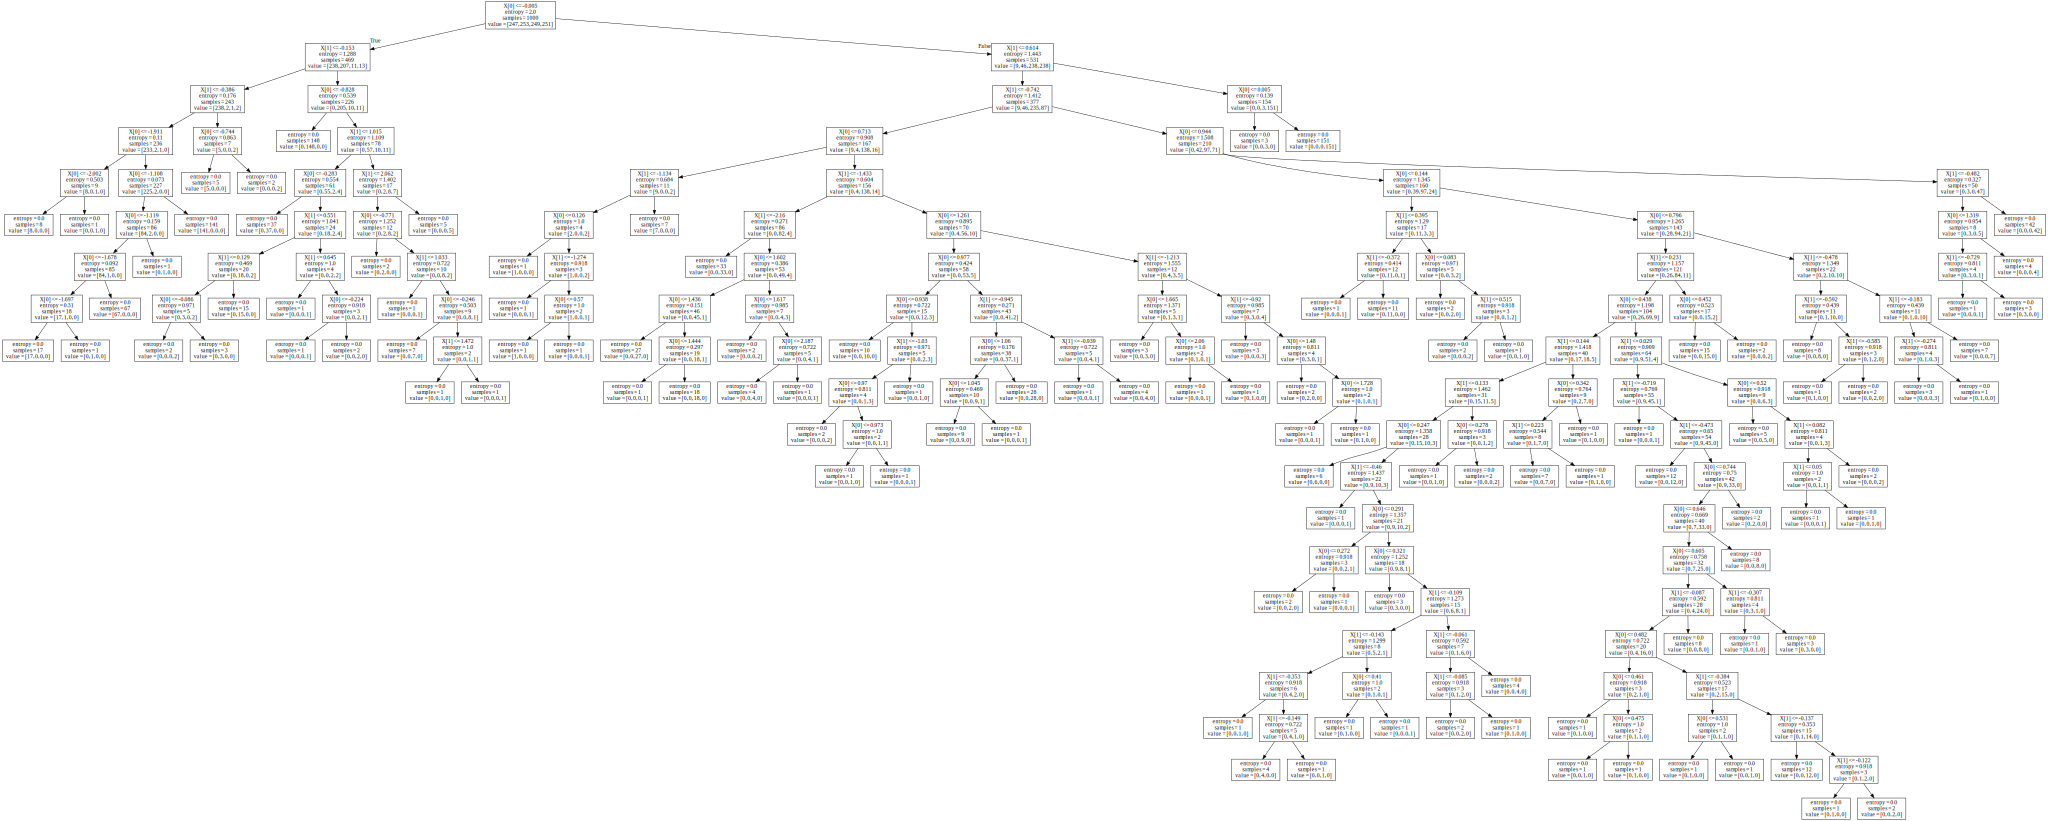

In [28]:
import graphviz
dot_data = tree.export_graphviz(id3,)
graph = graphviz.Source(dot_data)
graph

In [7]:
cartC = DecisionTreeClassifier()
cartC.fit(data[0], data[1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

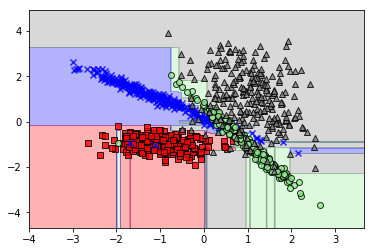

In [8]:
plot_decision_regions(X=data[0], y=data[1],
                      classifier=cartC, test_idx=range(105, 150))

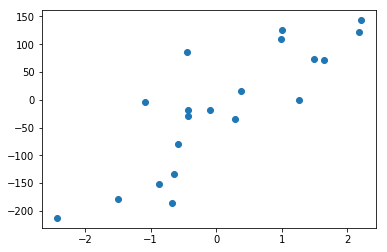

In [64]:
load_dataset = datasets.make_regression
data = load_dataset(n_samples=20, n_features=1, bias=0.5, noise=50,random_state=123,)
plt.scatter(data[0],data[1]);

In [65]:
from sklearn.tree import DecisionTreeRegressor
regtree = DecisionTreeRegressor()
regtree.fit(data[0], data[1])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

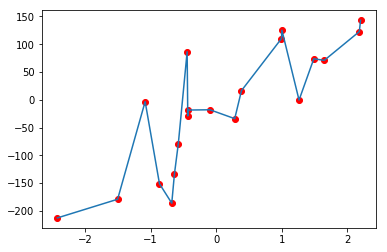

In [78]:
y = regtree.predict(data[0])
plt.scatter(data[0],data[1], c='r')
idx = np.argsort(data[0], axis=0)
plt.plot(data[0][idx].flatten(), y[idx]);

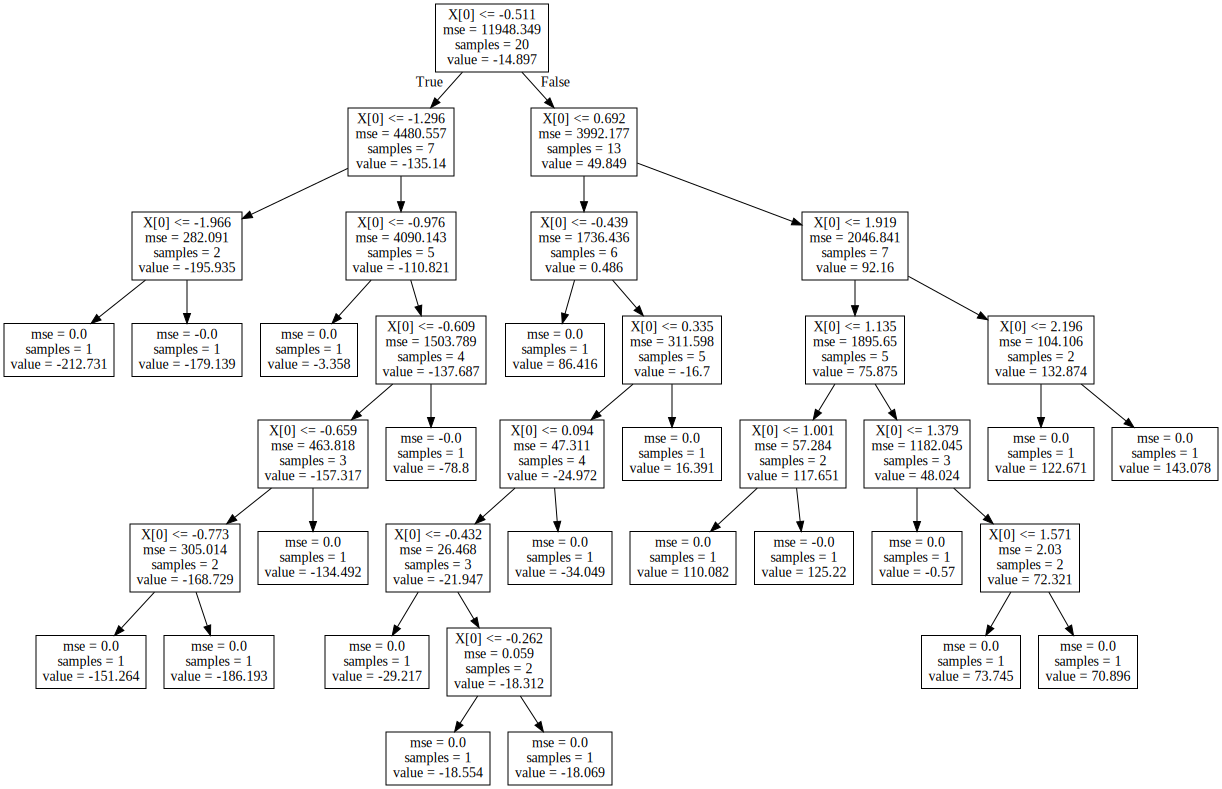

In [80]:
dot_data = tree.export_graphviz(regtree,)
graph = graphviz.Source(dot_data)
graph